In [1]:
# Loading coffee production data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load coffee production data
coffee_prod = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Annual World Green Coffee Production June Year-End.csv")
print(coffee_prod.head())
print(coffee_prod.tail())
# Rename yield column
coffee_prod.rename(columns={'World Production (June Year End)': 'Production'}, inplace = True)
print(coffee_prod.head())

# Load coffee price data
# Load robusta prices
robusta_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFROBUSDM.csv")
print(robusta_prices.head())
print(robusta_prices.tail())

# Load other mild prices
other_mild_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFOTMUSDM.csv")
print(other_mild_prices.head())
print(other_mild_prices.tail())

# Start all series in 1990 and end all series in 2023 (last year of complete production)
robusta_prices = robusta_prices.head(len(robusta_prices) - 9)
other_mild_prices = other_mild_prices.head(len(other_mild_prices) - 9)
coffee_prod = coffee_prod.head(len(coffee_prod) - 2)
coffee_prod = coffee_prod.tail(len(coffee_prod) - 29)
print(robusta_prices.head())
print(robusta_prices.tail())
print(other_mild_prices.head())
print(other_mild_prices.tail())
print(coffee_prod.head())
print(coffee_prod.tail())

# Create annual average prices for robusta and other mild prices to assess relationship with annual yield data
'Annual Average Coffee Bean Prices'
# Create time index for annual mean calculation
robusta_prices.loc[:, 'DATE'] = pd.to_datetime(robusta_prices['DATE'])
robusta_prices.set_index('DATE', inplace=True)
other_mild_prices.loc[:, 'DATE'] = pd.to_datetime(other_mild_prices['DATE'])
other_mild_prices.set_index('DATE', inplace=True)
annual_robusta = robusta_prices.resample('YE').mean()
annual_other_mild = other_mild_prices.resample('YE').mean()
print(annual_robusta.head())
print(annual_robusta.tail())
print(annual_other_mild.head())
print(annual_other_mild.tail())

# Merge series to the same dataframe
coffee_prod.loc[:, 'Year_only'] = coffee_prod['Year']
# Convert 'Year' to datetime and extract the year
annual_other_mild = annual_other_mild.reset_index().rename(columns={'DATE': 'Year'})
annual_robusta = annual_robusta.reset_index().rename(columns={'DATE': 'Year'})
annual_other_mild.loc[:, 'Year'] = pd.to_datetime(annual_other_mild['Year'])
annual_other_mild.loc[:, 'Year_only'] = annual_other_mild['Year'].dt.year
annual_robusta.loc[:, 'Year'] = pd.to_datetime(annual_robusta['Year'])
annual_robusta.loc[:, 'Year_only'] = annual_robusta['Year'].dt.year

combined_df = pd.merge(coffee_prod[['Year_only', 'Production']], annual_other_mild[['Year_only', 'PCOFFOTMUSDM']], on='Year_only', how='inner')
combined_df = pd.merge(combined_df, annual_robusta[['Year_only', 'PCOFFROBUSDM']], on='Year_only', how='inner')
print(combined_df)

   Year World Production (June Year End)
0  1961                           65,341
1  1962                           75,878
2  1963                           67,781
3  1964                           65,295
4  1965                           52,612
    Year World Production (June Year End)
60  2021                          176,559
61  2022                          165,037
62  2023                          164,412
63  2024                          169,180
64  2025                          176,235
   Year Production
0  1961     65,341
1  1962     75,878
2  1963     67,781
3  1964     65,295
4  1965     52,612
         DATE  PCOFFROBUSDM
0  1990-01-01     50.520000
1  1990-02-01     51.299999
2  1990-03-01     57.680000
3  1990-04-01     57.389999
4  1990-05-01     55.029999
           DATE  PCOFFROBUSDM
412  2024-05-01    186.457391
413  2024-06-01    204.327000
414  2024-07-01    214.541304
415  2024-08-01    214.695455
416  2024-09-01    242.461905
         DATE  PCOFFOTMUSDM
0  1990-01-0

C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [3]:
# Summary statistics
print('\n***Production Summary Statistics***')
# Convert Production column to numbers
# to_numeric is an attribute of pandas, not the dataframe
coffee_prod['Production'] = pd.to_numeric(coffee_prod['Production'].str.replace(',', ''), errors = 'coerce')
print(coffee_prod['Production'].describe())


***Production Summary Statistics***
count        34.000000
mean     129755.411765
std       27505.305678
min       88946.000000
25%      105286.250000
50%      125840.000000
75%      156962.500000
max      176559.000000
Name: Production, dtype: float64


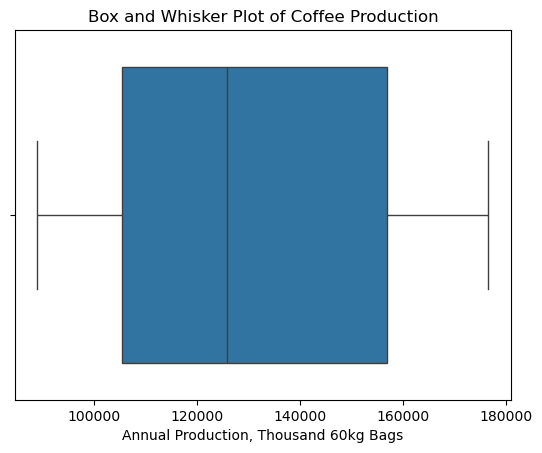

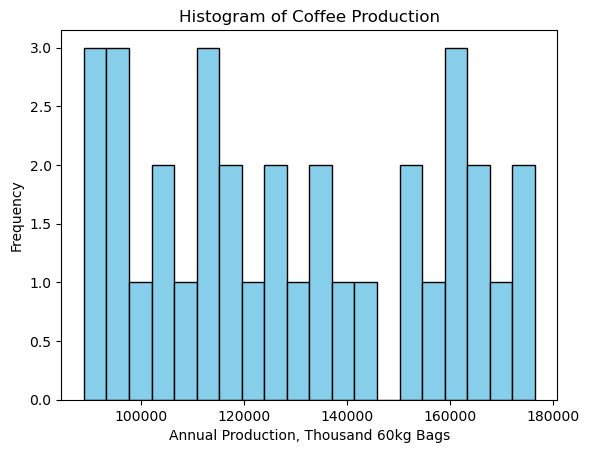

In [5]:
# Plots of distribution

# Box and whisker plot
sns.boxplot(x=coffee_prod['Production'])
plt.title('Box and Whisker Plot of Coffee Production')
plt.xlabel('Annual Production, Thousand 60kg Bags')
plt.show()

# Histogram of coffee production
plt.hist(coffee_prod['Production'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Coffee Production')
plt.xlabel('Annual Production, Thousand 60kg Bags')
plt.ylabel('Frequency')
plt.show()

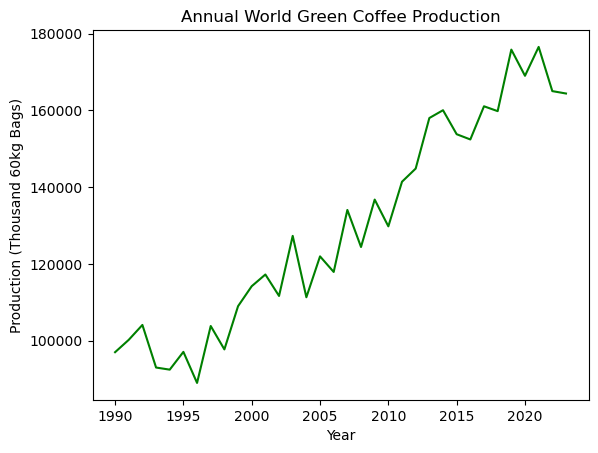

'Annual production has steadily increased over the last 35 years'

In [7]:
# Annual production lineplot
lineplot = sns.lineplot(x = 'Year', y = 'Production', data = coffee_prod, color = 'green')
plt.title('Annual World Green Coffee Production')
plt.ylabel('Production (Thousand 60kg Bags)')
plt.show()

'Annual production has steadily increased over the last 35 years'


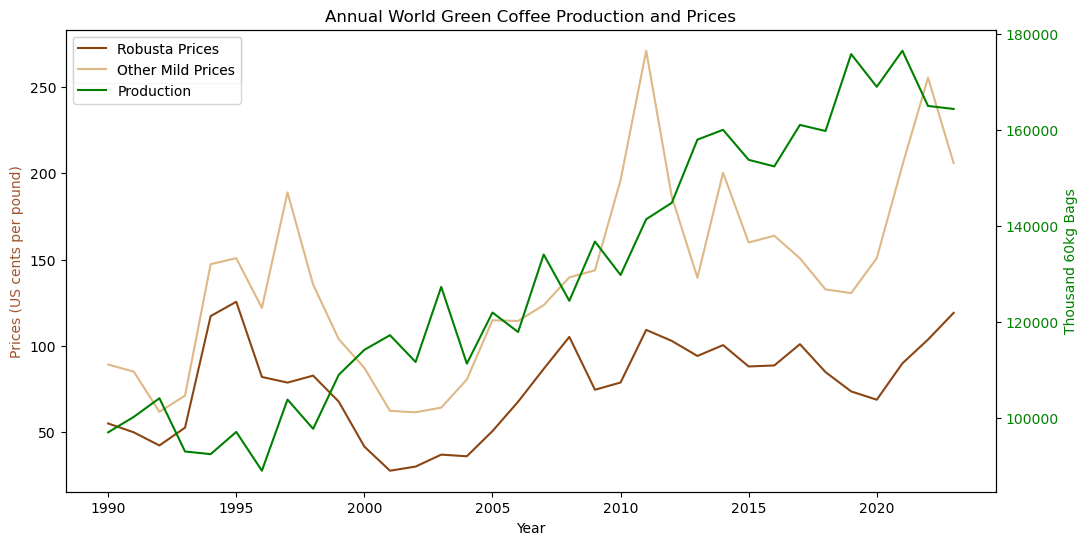

In [13]:
# Plot of annual average prices against annual production

# Ensure numeric values
if combined_df['Year_only'].dtype not in ['int64', 'float64']:
    combined_df.loc[:, 'Year_only'] = pd.to_numeric(combined_df['Year_only'])
if combined_df['Production'].dtype not in ['int64', 'float64']:
    combined_df.loc[:, 'Production'] = pd.to_numeric(combined_df['Production'].str.replace(',', ''))

fig, ax1 = plt.subplots(figsize=(12, 6))
line1 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFROBUSDM'], label='Robusta Prices', color='saddlebrown')
line2 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFOTMUSDM'], label='Other Mild Prices', color='burlywood')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prices (US cents per pound)', color='sienna')

# Create a second y-axis for production
ax2 = ax1.twinx()
line3 = ax2.plot(combined_df['Year_only'], combined_df['Production'], label='Production', color='green')
ax2.set_ylabel('Thousand 60kg Bags', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legends
plt.title('Annual World Green Coffee Production and Prices')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# Unified legend
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()
fig.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Annual World Green Coffee Production and Prices.png')


In [15]:
# Pearson's Rank Correlation Coefficient
from scipy.stats import pearsonr

print('\nRobusta Correlations')
robusta_prod_corr, robusta_prod_p_value = pearsonr(combined_df['Production'], combined_df['PCOFFROBUSDM'])
print(f'Production Pearson correlation: {robusta_prod_corr} P-value: {robusta_prod_p_value}')

print('\nOther Mild Correlations')
other_mild_prod_corr, other_mild_prod_p_value = pearsonr(combined_df['Production'], combined_df['PCOFFOTMUSDM'])
print(f'Production Pearson correlation: {other_mild_prod_corr} P-value: {other_mild_prod_p_value}')

'''
Knowing nothing about coffee demand, we might expect production quantity to be negatively correlation with price.
A positive Pearson's rank correlation suggests that supply might react quite quickly to changes in price.
Farmer's could be choosing between different crops and increase the amount of coffee produced when prices are higher.
We can reject the null hypothesis that global production quantity is not correlated with coffee prices at the 5% significance level.
'''


Robusta Correlations
Production Pearson correlation: 0.368322184842957 P-value: 0.032086607256159826

Other Mild Correlations
Production Pearson correlation: 0.5541301417978337 P-value: 0.0006732673266478059


"\nKnowing nothing about coffee demand, we might expect production quantity to be negatively correlation with price.\nA positive Pearson's rank correlation suggests that supply might react quite quickly to changes in price.\nFarmer's could be choosing between different crops and increase the amount of coffee produced when prices are higher.\nWe can reject the null hypothesis that global production quantity is not correlated with coffee prices at the 5% significance level.\n"


***ADF stationarity test***
ADF (constant only) test of production data
ADF test statistic: -0.132573235866899 P-value: 0.9460959040510176
(-0.132573235866899, 0.9460959040510176, 5, 28, {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}, 476.9999619857635)

***ADF trend-stationarity test***
ADF (constant + trend only) test of coffee production data
ADF test statistic: -4.032443868102069 P-value: 0.007903709584866497
(-4.032443868102069, 0.007903709584866497, 2, 31, {'1%': -4.284890375281125, '5%': -3.5630415894061964, '10%': -3.2152919724077744}, 472.7242551281343)
The ADF test suggests we should reject the null hypothesis that coffee production is not trend-stationary.

Change in Coffee Production
    Year_only  Production  PCOFFOTMUSDM  PCOFFROBUSDM  Production_diff  \
0        1990       96958     89.147504     54.986667              NaN   
1        1991      100181     85.027028     49.832604           3223.0   
2        1992      104064     61.737

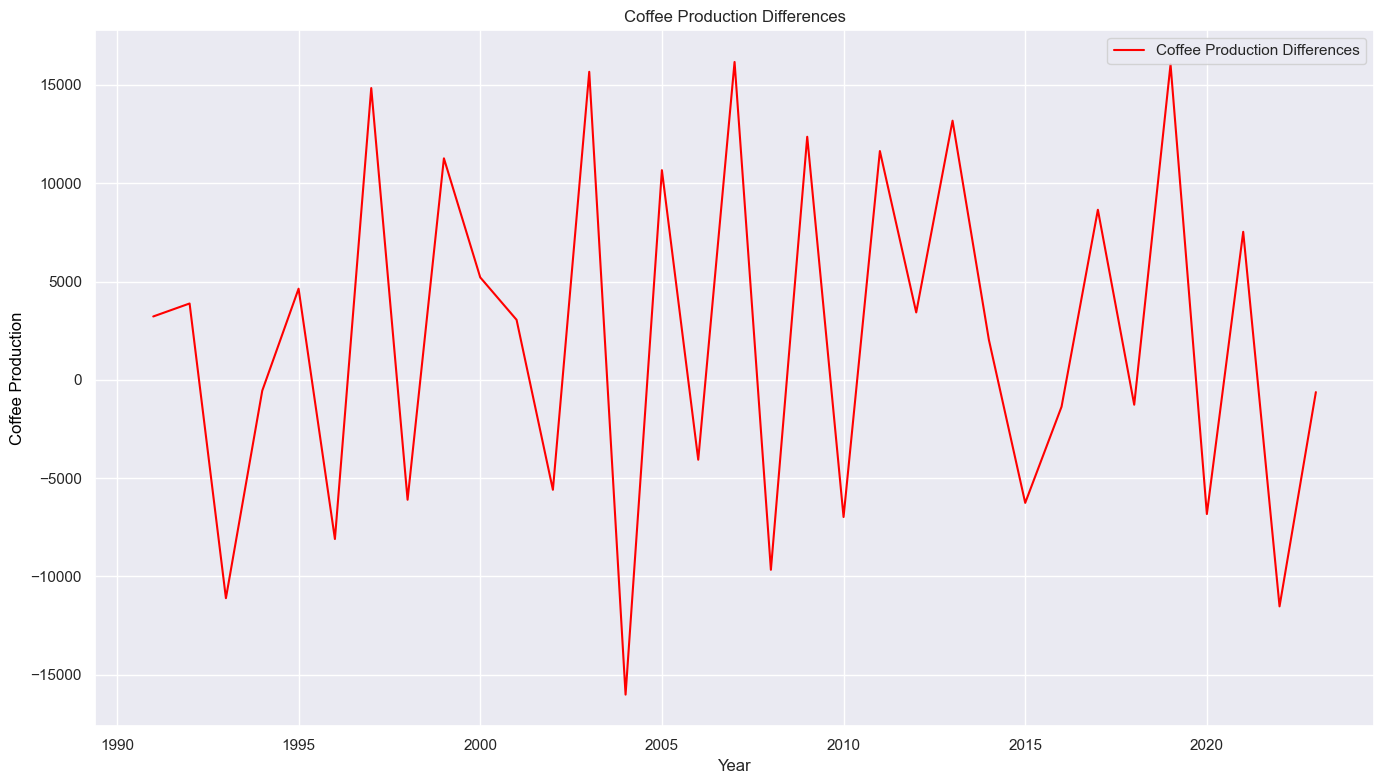

ADF test statistic: -3.6094982148099968 P-value: 0.005582017118785969
(-3.6094982148099968, 0.005582017118785969, 4, 28, {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}, 456.31393783813826)

KPSS (constant only) test of coffee production differences
KPSS (constant-only) test statistic: 0.10282096891327967 P-value: 0.1
(0.10282096891327967, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\marle\AppData\Local\Temp\ipykernel_38656\251296409.py:41: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x = combined_df['Production_diff'].dropna(), regression = "c")


'\nIntuitively, detrended production is more appealing than differenced production.\nProduction has been trending upwards to meet increased demand for coffee.\nBy de-trending, we capture the short-term deviations from the long-term increasing trend in production. These short-term fluctuations are likely to have greater impact on pricing.\nby de-trending we acknowledge the clear increase in coffee market size, instead of the upwards trend as the result of random fluctuations.\n'

In [25]:
# Stationarity Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF stationarity test
# The null hypothesis is that there is a unit root. The alternative hypothesis that there is no unit root (stationary).
print('\n***ADF stationarity test***')
print('ADF (constant only) test of production data')
result = adfuller(combined_df['Production'], regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)


# Is coffee production trend-stationary?
print('\n***ADF trend-stationarity test***')
print('ADF (constant + trend only) test of coffee production data')
result = adfuller(combined_df['Production'], regression = "ct")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('The ADF test suggests we should reject the null hypothesis that coffee production is not trend-stationary.')

# Is differenced production stationary?
print("\nChange in Coffee Production")
combined_df['Production_diff'] = combined_df['Production'] - combined_df['Production'].shift()
print(combined_df)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_only', y='Production_diff', data=combined_df, label='Coffee Production Differences', color='red')
plt.title('Coffee Production Differences')
plt.xlabel('Year')
plt.ylabel('Coffee Production', color='black')
sns.set_theme()
plt.tight_layout()
plt.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Coffee Production Differences.png')
plt.show()

# Ensure the NA from differencing is removed before the ADF test
result = adfuller(combined_df['Production_diff'].dropna(), regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('\nKPSS (constant only) test of coffee production differences')
result = kpss(x = combined_df['Production_diff'].dropna(), regression = "c")
print(f'KPSS (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)

'''
According to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced stocks is a stationary series at the 5% significance level.
According to the KPSS test, we cannot reject the null hypothesis that differenced stocks is a stationary time series.
So we should treat differenced stocks as stationary.
'''

'''
Intuitively, detrended production is more appealing than differenced production.
Production has been trending upwards to meet increased demand for coffee.
By de-trending, we capture the short-term deviations from the long-term increasing trend in production. These short-term fluctuations are likely to have greater impact on pricing.
by de-trending we acknowledge the clear increase in coffee market size, instead of the upwards trend as the result of random fluctuations.
'''

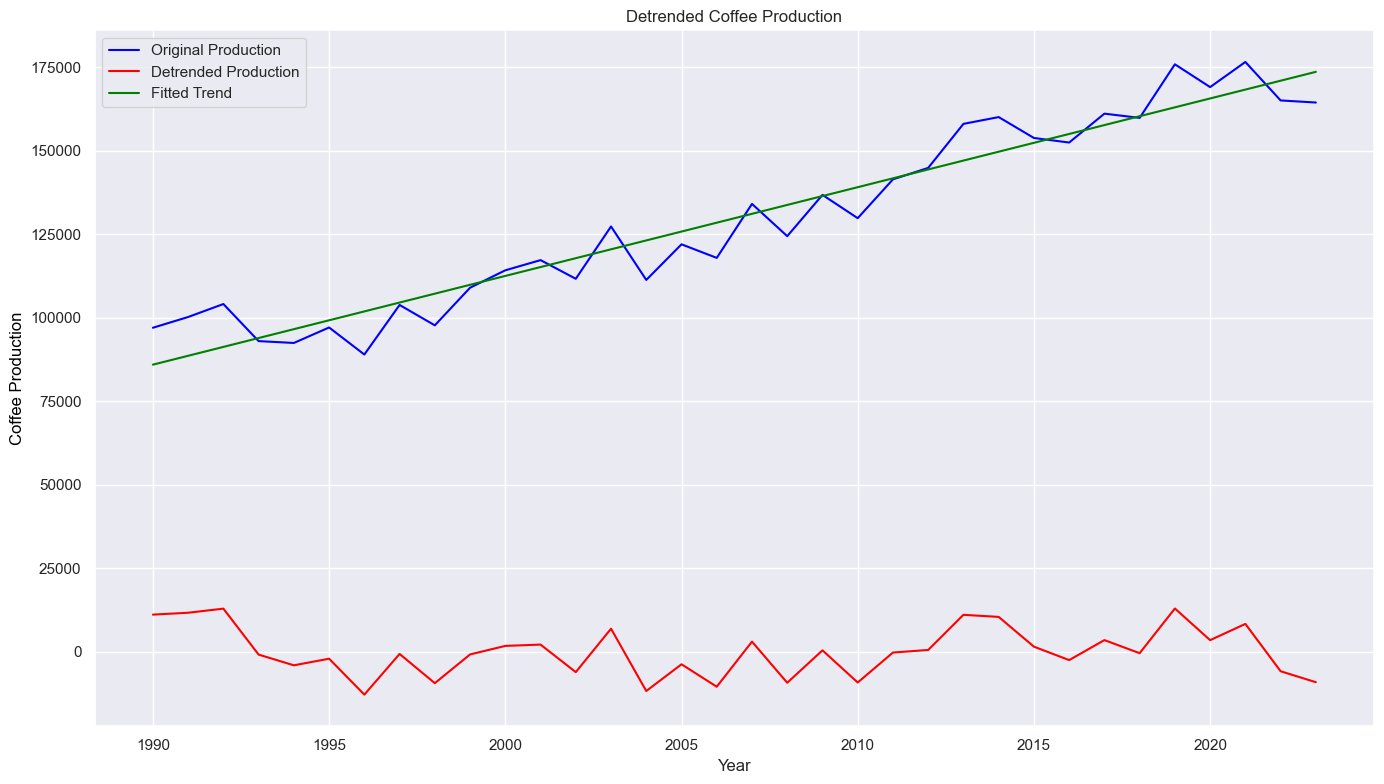

In [27]:
# De-trending Coffee Production

import statsmodels.api as sm

combined_df['Year_only'] = pd.to_numeric(combined_df['Year_only'], errors='coerce')
combined_df['Production'] = pd.to_numeric(combined_df['Production'], errors='coerce')
combined_df = combined_df.dropna(subset=['Year_only', 'Production'])

# Time variable and constant for de-trending regression
time = combined_df['Year_only']
X = sm.add_constant(time)

# OLS regression
model = sm.OLS(combined_df['Production'], X)
trend_model = model.fit()

# Calculate fitted and de-trended values
fitted_trend = trend_model.predict(X)
combined_df['Production_detrended'] = combined_df['Production'] - fitted_trend

# Plots
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_only', y='Production', data=combined_df, label='Original Production', color='blue')
sns.lineplot(x='Year_only', y='Production_detrended', data=combined_df, label='Detrended Production', color='red')
sns.lineplot(x='Year_only', y=fitted_trend, data=combined_df, label='Fitted Trend', color='green')

plt.title('Detrended Coffee Production')
plt.xlabel('Year')
plt.ylabel('Coffee Production', color='black')

sns.set_theme()
plt.tight_layout()
plt.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Detrended_Coffee_Production.png')
plt.show()